In [1]:
# 导入必要的库
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# 加载数据集
file_path = 'dataset/NBA_Season_Stats.csv'
data = pd.read_csv(file_path)

# 显示数据集的前几行
data.head()

,Year,Player,Pos,Age,Tm,G,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1980,Kareem Abdul-Jabbar*,C,32,LAL,82,3143,835,1383,0.604,...,0.765,190,696,886,371,81,280,297,216,2034
1,1980,Tom Abernethy,PF,25,GSW,67,1222,153,318,0.481,...,0.683,62,129,191,87,35,12,39,118,362
2,1980,Alvan Adams,C,25,PHO,75,2168,465,875,0.531,...,0.797,158,451,609,322,108,55,218,237,1118
3,1980,Tiny Archibald*,PG,31,BOS,80,2864,383,794,0.482,...,0.830,59,138,197,671,106,10,242,218,1131
4,1980,Dennis Awtrey,C,31,CHI,26,560,27,60,0.450,...,0.640,29,86,115,40,12,15,27,66,86


In [2]:
# 检查数据集的缺失值情况
data.info()

# 检查每列的缺失值数量
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18727 entries, 0 to 18726
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    18727 non-null  int64  
 1   Player  18727 non-null  object 
 2   Pos     18727 non-null  object 
 3   Age     18727 non-null  int64  
 4   Tm      18727 non-null  object 
 5   G       18727 non-null  int64  
 6   MP      18727 non-null  int64  
 7   FG      18727 non-null  int64  
 8   FGA     18727 non-null  int64  
 9   FG%     18639 non-null  float64
 10  3P      18727 non-null  int64  
 11  3PA     18727 non-null  int64  
 12  3P%     15242 non-null  float64
 13  2P      18727 non-null  int64  
 14  2PA     18727 non-null  int64  
 15  2P%     18610 non-null  float64
 16  eFG%    18639 non-null  float64
 17  FT      18727 non-null  int64  
 18  FTA     18727 non-null  int64  
 19  FT%     17985 non-null  float64
 20  ORB     18727 non-null  int64  
 21  DRB     18727 non-null  int64  
 22

Year         0
Player       0
Pos          0
Age          0
Tm           0
G            0
MP           0
FG           0
FGA          0
FG%         88
3P           0
3PA          0
3P%       3485
2P           0
2PA          0
2P%        117
eFG%        88
FT           0
FTA          0
FT%        742
ORB          0
DRB          0
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler

# 数据清理：去除无关列并处理缺失值
data_cleaned = data.drop(columns=['Player', 'Tm', 'Year'])
data_cleaned = data_cleaned.dropna()

# 特征工程：创建PTS_per_min特征
data_cleaned['PTS_per_min'] = data_cleaned['PTS'] / data_cleaned['MP']

# 选择用于分类的特征（根据重要性排名）
selected_features = ['AST', 'TRB', 'MP', 'DRB', 'ORB', 'STL', 'BLK', 'FG%', 'eFG%', 'PF', 'TOV', 'PTS', '2P%', 'G', 'PTS_per_min', '3P%', 'Age', 'FT%']

# 标准化特征数据
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_cleaned[selected_features])

# 将标准化的数据转换为DataFrame格式
data_standardized_df = pd.DataFrame(data_standardized, columns=selected_features)

# 添加标签列
data_standardized_df['Pos'] = data_cleaned['Pos'].values

# 获取标签列
le = LabelEncoder()
data_standardized_df['Pos'] = le.fit_transform(data_standardized_df['Pos'])


# 显示处理后的数据集的前几行
data_standardized_df.head()

,AST,TRB,MP,DRB,ORB,STL,BLK,FG%,eFG%,PF,TOV,PTS,2P%,G,PTS_per_min,3P%,Age,FT%,Pos
0,1.644141,3.274195,2.001621,3.772487,1.890449,0.911111,7.088705,2.447942,1.996337,1.227759,3.168998,3.000049,1.997028,1.120132,2.123105,-1.427193,1.306569,0.192172,0
1,-0.323607,-0.165457,-0.126283,-0.215758,-0.041623,-0.279724,-0.366120,0.614580,0.151779,-0.030762,-0.668417,-0.425483,0.293198,0.495339,-0.793629,-1.427193,-0.459985,-0.462163,1
2,1.304635,1.903283,0.921607,2.049171,1.407431,1.610080,0.829990,1.359849,0.901600,1.497442,1.993975,1.123382,0.997260,0.828562,1.030361,-1.427193,-0.459985,0.447522,0
3,3.722747,-0.135762,1.692571,-0.152453,-0.086906,1.558304,-0.421753,0.629485,0.211765,1.253443,2.350944,1.150016,0.363604,1.036826,0.026463,-0.155353,1.054204,0.710852,2
4,-0.746257,-0.972166,-1.280514,-0.968390,-0.886905,-1.004581,-0.588652,0.256851,0.001815,-1.314968,-1.084881,-1.089283,-0.298214,-1.462347,-1.501164,4.301815,0.297110,-2.840113,4


In [11]:
# 特征和标签
X = data_standardized_df.drop(['Pos'], axis=1)
y = data_standardized_df['Pos']

# 拆分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((11948, 18), (2987, 18), (11948,), (2987,))

In [12]:
# 使用ID3算法训练模型
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

# 预测测试集的结果
y_pred = model.predict(X_test)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Report: \n{report}')

Accuracy: 0.5339805825242718
Report: 
              precision    recall  f1-score   support

           0       0.53      0.52      0.52       393
           1       0.49      0.46      0.48       605
           2       0.75      0.76      0.75       713
           3       0.43      0.42      0.43       643
           4       0.44      0.48      0.46       633

    accuracy                           0.53      2987
   macro avg       0.53      0.53      0.53      2987
weighted avg       0.53      0.53      0.53      2987



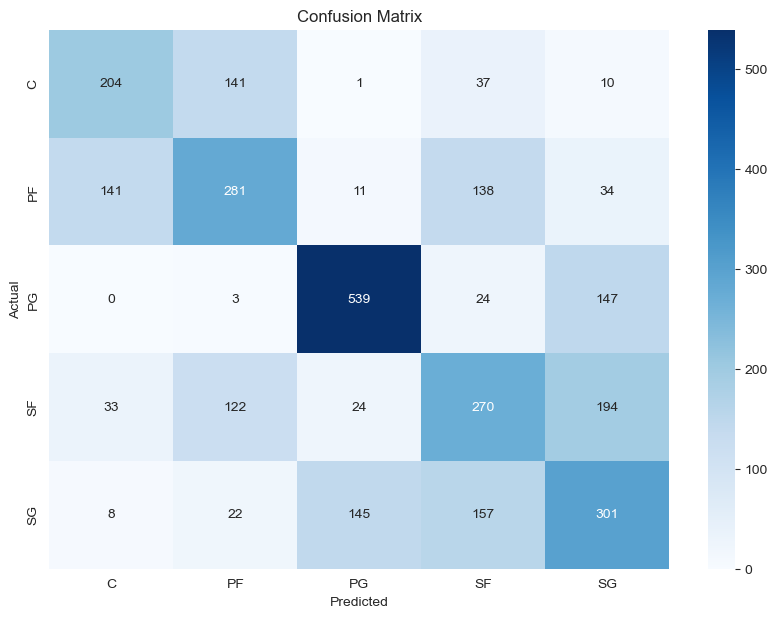

In [13]:
# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
